In [38]:
#回帰とは2

#目標
#標準化を活用した回帰を実施できること
#多重共線性を対処した上で、回帰を実施できること

In [39]:
#1.データの準備

#ライブラリの準備
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib

#データの読込
df = pd.read_csv('california_housing_cleansing.csv')
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [40]:
#説明変数と目的変数の分割
x = df.drop(columns=['住宅価格']).to_numpy() #説明変数の定義
y = df['住宅価格'].to_numpy() #目的変数の定義

#学習データとテストデータの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [41]:
#回帰手法の改善（標準化）
#標準化とは、もとのデータの平均を0、分散を1に変換することです。
#標準化を行うことで、各要素のスケールを統一することができ、予測モデルの式から各要素の重みを比較しやすくなります。

#標準化を活用したスケールの変換
#1.StandardScalerクラスのインポート
#2.StandardScalerクラスのインスタンス化
#3.標準化の変換モデルの生成
#4.標準化の変換モデルを利用したスケールの変換

In [42]:
#1.StandardScalerクラスのインポート
from sklearn.preprocessing import StandardScaler

#2.StandardScalerクラスのインスタンス化
scaler = StandardScaler()

#3.標準化の変換モデルの生成
scaler.fit(x_train) #各列の平均値と標準偏差を計算して覚える

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [43]:
#4.標準化の変換モデルを利用したスケールの変換
x_train_scaled = scaler.transform(x_train) #3で覚えた平均値と標準偏差を利用して、x_trainのデータを変換する

#折角なので、変換前後のデータを確認してみましょう！
#変換前のデータ
df_x_train = pd.DataFrame(x_train, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'])
df_x_train.head()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
0,3.7500,29.0,1390.0,34.04,-117.98,1.056115,0.223022
1,3.1187,25.0,588.0,33.01,-117.07,3.605442,0.647959
2,4.6406,45.0,1180.0,33.90,-118.07,1.505085,0.299153
3,5.9010,18.0,2882.0,34.33,-118.43,2.044067,0.319223
4,2.6167,42.0,1271.0,37.99,-122.34,1.204563,0.256491


In [44]:
#変換後のデータ
df_x_train_scaled = pd.DataFrame(x_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'])
df_x_train_scaled.head()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
0,0.034653,0.178247,-0.075532,-0.723337,0.760166,-0.837592,-0.809192
1,-0.368102,-0.170455,-0.767887,-1.203976,1.220266,1.614325,1.182965
2,0.602835,1.573057,-0.256822,-0.788667,0.714662,-0.405778,-0.452281
3,1.406941,-0.780684,1.212489,-0.588012,0.532645,0.112610,-0.358190
4,-0.688367,1.311530,-0.178263,1.119887,-1.444266,-0.694816,-0.652284


In [45]:
#df_X_train_scaledの各要素の平均値と標準偏差を確認し、問題なく標準化されているかチェックしましょう！
df_x_train_scaled.describe()

#mean(平均値)が0、std(標準偏差)が1になっていることがわかりますね！これで、各要素のスケールが統一されました。

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.534356e-15,7.870627e-17,8.362541e-17,-3.488656e-14,-8.354671e-14,1.133999e-14,-1.849051e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-1.418630e+00,-2.420081e+00,-1.850904e+00,-1.851601e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-7.793341e-01,-1.034727e+00,-4.232155e-01,-3.998158e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,-6.300096e-01,5.225325e-01,-2.454245e-02,-1.384252e-01
75%,5.805695e-01,7.884766e-01,2.622279e-01,9.752284e-01,7.652223e-01,2.989548e-01,1.855580e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.935112e+00,2.615732e+00,3.790064e+01,3.916628e+01


In [46]:
#次に、説明変数のテストデータも同様に変換してみましょう！
x_test_scaled = scaler.transform(x_test) #3で覚えた平均値と標準偏差を利用して、x_testのデータを変換する

#テストデータも同様に、変換前後のデータを確認してみましょう！
#変換前のデータ
df_x_test = pd.DataFrame(x_test, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'])
df_x_test.head()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
0,2.9628,36.0,2388.0,34.13,-117.27,1.397404,0.287688
1,2.2279,37.0,72.0,37.65,-120.95,1.888889,0.277778
2,4.5781,9.0,2235.0,33.18,-117.26,2.031320,0.354810
3,5.5209,35.0,1052.0,34.22,-118.52,1.539924,0.258555
4,2.2361,46.0,101.0,38.02,-121.82,1.742574,0.425743


In [47]:
#変換後のデータ
df_x_train_scaled = pd.DataFrame(x_train_scaled, columns=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'])
df_x_train_scaled.head()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
0,0.034653,0.178247,-0.075532,-0.723337,0.760166,-0.837592,-0.809192
1,-0.368102,-0.170455,-0.767887,-1.203976,1.220266,1.614325,1.182965
2,0.602835,1.573057,-0.256822,-0.788667,0.714662,-0.405778,-0.452281
3,1.406941,-0.780684,1.212489,-0.588012,0.532645,0.112610,-0.358190
4,-0.688367,1.311530,-0.178263,1.119887,-1.444266,-0.694816,-0.652284


In [49]:
df_x_train_scaled.describe()

,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
count,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04,1.300000e+04
mean,4.534356e-15,7.870627e-17,8.362541e-17,-3.488656e-14,-8.354671e-14,1.133999e-14,-1.849051e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-2.038837e+00,-2.262670e+00,-1.268592e+00,-1.418630e+00,-2.420081e+00,-1.850904e+00,-1.851601e+00
25%,-7.374752e-01,-8.678601e-01,-5.701945e-01,-7.793341e-01,-1.034727e+00,-4.232155e-01,-3.998158e-01
50%,-1.394514e-01,3.896079e-03,-2.291970e-01,-6.300096e-01,5.225325e-01,-2.454245e-02,-1.384252e-01
75%,5.805695e-01,7.884766e-01,2.622279e-01,9.752284e-01,7.652223e-01,2.989548e-01,1.855580e-01
max,7.211958e+00,2.096111e+00,2.952823e+01,2.935112e+00,2.615732e+00,3.790064e+01,3.916628e+01


In [50]:
#それでは、標準化したデータを用いて、回帰分析を実施してみましょう！
#予測モデルの学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [51]:
#予測モデルの評価
#学習データで決定係数の確認
model.score(x_train_scaled, y_train)

0.5967954005117011

In [52]:
#テストデータで決定係数の確認
model.score(x_test_scaled, y_test)

0.5752388860477974

In [53]:
#予測
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])

X_new_scaled = scaler.transform(X_new) #X_newのデータを変換する
#もしも、X_newのデータを変換せずに予測してしまうと、予測モデルの式から各要素の重みを比較することができなくなってしまいます。
X_new_scaled

array([[ 2.74605512,  1.22435471, -0.84385579,  0.65791393, -0.26115327,
        -0.8915631 , -0.91712007],
       [-1.08180733, -1.4780894 ,  0.45107143,  1.1245529 , -1.27236074,
        -0.41066806,  0.48931492],
       [-1.71978441, -0.17045515, -0.41221338,  1.1245529 , -0.76675701,
         0.07022698,  2.83337325]])

In [54]:
model.predict(X_new_scaled)

array([3.2387497 , 1.42228534, 1.43428255])

<Axes: >

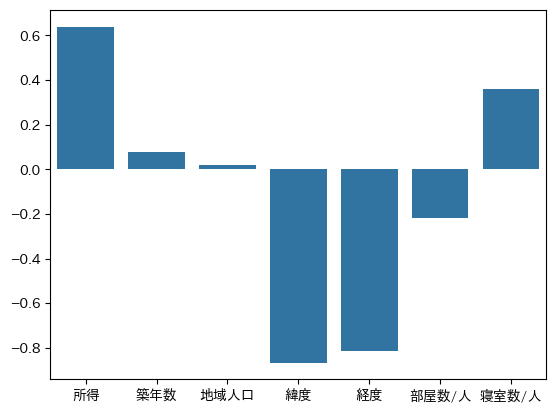

In [55]:
#各要素が住宅価格に与える影響
#前回の「回帰とは」では、各要素の重みを比較することはできませんでした・今回はどうでしょう？

sns.barplot(x=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)

In [ ]:
#重みを考察してみると、所得・緯度・経度の影響を受けるように思います。本当でしょうか？
#多重共線性という問題を抱えている為、正しいとは限りません。

#多重共線性とは何ぞや
#似た者同士が多すぎると、AIが混乱して、誰が本当に重要なのか分からなくなってしまうことを多重共線性といいます。

#アイドルの人気（住宅価格）を分析する場合
#SNSのフォロー数とインスタのフォロワー数を説明変数にすると、どちらも似た者同士なので、AIはどちらが重要なのか分からなくなってしまいます。

#対処1：1つだけ残す(例えば、SNSのフォロー数だけ残す)
#メリット：シンプルで分かりやすい　デメリット：情報の損失が大きい

#対処2：似た者同士を合体させる(例えば、SNSのフォロー数とインスタのフォロワー数を合体させて、SNSの人気という新しい説明変数を作る)
#メリット：情報の損失が少ない　デメリット：新しい説明変数を作る必要がある

#

In [ ]:
#多重共線性への対処（今回は1つだけ残す）
#まずは説明変数同士の相関関係を確認します。
df.drop(columns=['住宅価格']).corr()

#緯度・経度、部屋数/人・寝室数/人が似た者同士であることがわかりますね！


,所得,築年数,地域人口,緯度,経度,部屋数/人,寝室数/人
所得,1.000000,-0.202770,0.040534,-0.075305,-0.016145,0.210331,-0.060904
築年数,-0.202770,1.000000,-0.280775,-0.051961,-0.033877,-0.157083,-0.097772
地域人口,0.040534,-0.280775,1.000000,-0.106927,0.090809,-0.136746,-0.132073
緯度,-0.075305,-0.051961,-0.106927,1.000000,-0.922726,0.156807,0.111326
経度,-0.016145,-0.033877,0.090809,-0.922726,1.000000,-0.077510,-0.041287
部屋数/人,0.210331,-0.157083,-0.136746,0.156807,-0.077510,1.000000,0.913547
寝室数/人,-0.060904,-0.097772,-0.132073,0.111326,-0.041287,0.913547,1.000000


<Axes: xlabel='緯度', ylabel='経度'>

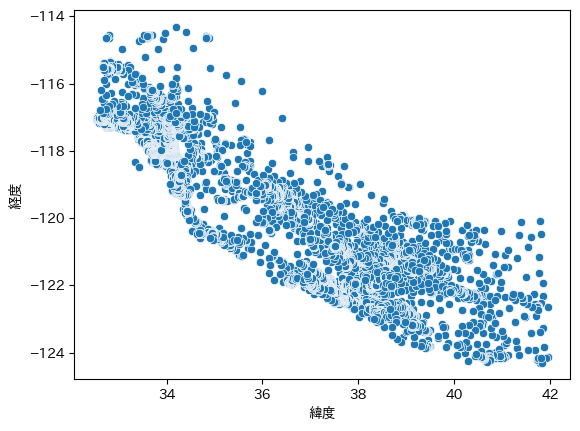

In [57]:
#まずは緯度・経度ペアから対処しましょう！
sns.scatterplot(x=df['緯度'], y=df['経度'])

<Axes: xlabel='部屋数/人', ylabel='寝室数/人'>

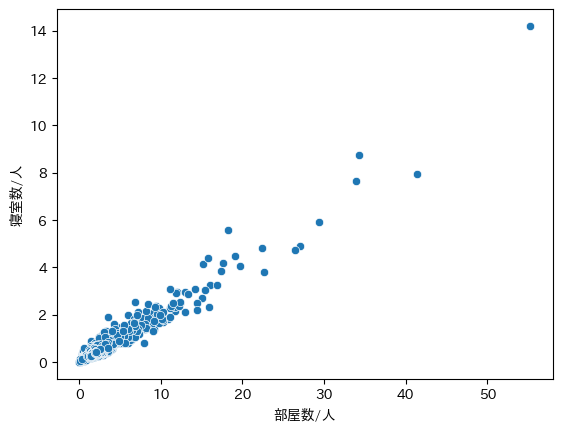

In [58]:
#次に、部屋数/人・寝室数/人ペアを対処しましょう！
sns.scatterplot(x=df['部屋数/人'], y=df['寝室数/人'])

In [59]:
#今回は、所得・築年数・地域人口・緯度・部屋数/人のみを説明変数としましょう！
#それでは、改めて、説明変数の学習データとテストデータを分割してみましょう！
X = df[['所得', '築年数', '地域人口', '緯度', '部屋数/人']].to_numpy()
y = df['住宅価格'].to_numpy()

#学習データとテストデータの分割
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#スケール変換モデルの生成
scaler = StandardScaler()
scaler.fit(x_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [60]:
#変換モデルを利用して、x_trainとx_testのデータを変換する
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#予測モデルの学習
model = LinearRegression()
model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [61]:
#予測モデルの評価
print(model.score(x_train_scaled, y_train))
print(model.score(x_test_scaled, y_test))

0.4740232339239421
0.4835885444947773


In [62]:
#予測
X_new = np.array([[8, 41, 500, 38, 2],
                  [10, 10, 1000, 40, 1],
                  [7.5, 25, 3500, 39, 3]])

X_new_scaled = scaler.transform(X_new) #X_newのデータを変換する

model.predict(X_new_scaled)

array([3.68520926, 3.9076587 , 3.36531902])

<Axes: >

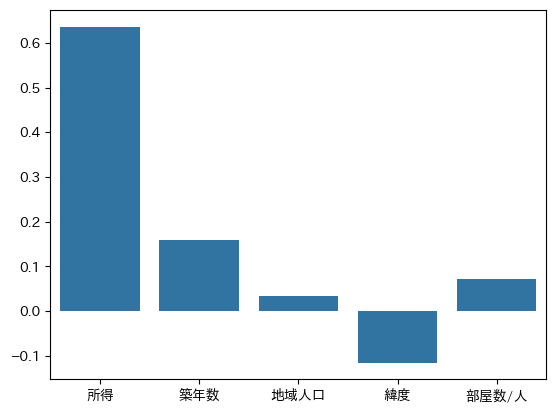

In [63]:
#予測モデルの考察
#さて、各要素の重みはどうなったでしょうか？

sns.barplot(x=['所得', '築年数', '地域人口', '緯度', '部屋数/人'], y=model.coef_)